<a href="https://colab.research.google.com/github/Satan07/LGMVIP-DataScience/blob/main/ADVANCE_TASK_2_Next_Word_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DATA SCIENCE INTERN AT LETSGROWMORE LGMVIPDECEMBER 2021 BATCH**

###**NAME** : **SATYAM PALKAR** 

### **ADVANCE TASK 2 : Next Word Prediction.**

In [2]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [3]:
text = open('1661-0.txt' ,encoding ='UTF-8').read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [4]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [5]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [6]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [7]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [8]:
print(X[0][0])

[False False False ... False False False]


In [9]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [10]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
811/811 [==============================] - 236s 283ms/step - loss: 6.0018 - accuracy: 0.1082 - val_loss: 7.0847 - val_accuracy: 0.1044
Epoch 2/10
811/811 [==============================] - 221s 272ms/step - loss: 5.7821 - accuracy: 0.1474 - val_loss: 8.0068 - val_accuracy: 0.1049
Epoch 3/10
811/811 [==============================] - 220s 271ms/step - loss: 5.7531 - accuracy: 0.1780 - val_loss: 7.9160 - val_accuracy: 0.1097
Epoch 4/10
811/811 [==============================] - 220s 272ms/step - loss: 5.4421 - accuracy: 0.2108 - val_loss: 8.1324 - val_accuracy: 0.1029
Epoch 5/10
811/811 [==============================] - 220s 271ms/step - loss: 5.1376 - accuracy: 0.2494 - val_loss: 8.4188 - val_accuracy: 0.0936
Epoch 6/10
811/811 [==============================] - 220s 272ms/step - loss: 4.8713 - accuracy: 0.2911 - val_loss: 8.5603 - val_accuracy: 0.0868
Epoch 7/10
811/811 [==============================] - 220s 271ms/step - loss: 4.6335 - accuracy: 0.3319 - val_loss: 8.6821 -

In [11]:
history

{'accuracy': [0.10817375034093857,
  0.1474185436964035,
  0.17804720997810364,
  0.2107768952846527,
  0.24941450357437134,
  0.29114583134651184,
  0.33190372586250305,
  0.36908605694770813,
  0.4042733609676361,
  0.4347478151321411],
 'loss': [6.001797199249268,
  5.782100200653076,
  5.753105640411377,
  5.442107200622559,
  5.137565612792969,
  4.871340751647949,
  4.633545398712158,
  4.440408706665039,
  4.295839786529541,
  4.152001857757568],
 'val_accuracy': [0.10435737669467926,
  0.10490662604570389,
  0.10966678708791733,
  0.10289271175861359,
  0.09355547279119492,
  0.08678139746189117,
  0.0853167325258255,
  0.0792749896645546,
  0.06993775069713593,
  0.07872574031352997],
 'val_loss': [7.084724426269531,
  8.00681209564209,
  7.91603422164917,
  8.132403373718262,
  8.418843269348145,
  8.56029987335205,
  8.682136535644531,
  8.788846969604492,
  8.795217514038086,
  8.914220809936523]}

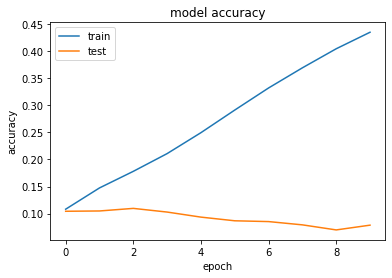

In [12]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

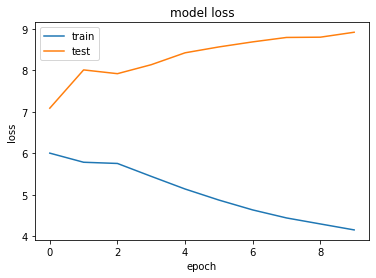

In [13]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [14]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [15]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [16]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [17]:
q =  "There is nothing more deceptive than an obvious fact"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  There is nothing more deceptive than an obvious fact
Sequence:  there is nothing more deceptive
there
is
nothing
more
deceptive
next possible words:  ['than', 'so', 'said', 'very', 'no']
